In [1]:
import numpy as np
import pandas as pd

In [2]:
cars=pd.read_csv("cars.csv")

In [3]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
cars=cars.iloc[:,1:]

In [5]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


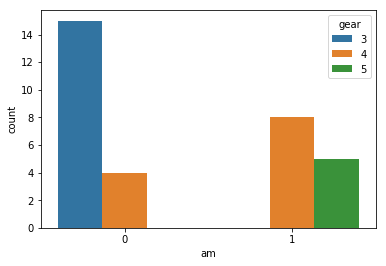

In [80]:
import seaborn as sns
%matplotlib inline
sns.countplot(x='am',data=cars,hue='gear')

In [81]:
cars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [23]:
y=cars.am
X=cars.iloc[:,[0,1,2,3,8,9,10]]

In [24]:
X.head()


,mpg,cyl,disp,hp,am,gear,carb
0,21.0,6,160.0,110,1,4,4
1,21.0,6,160.0,110,1,4,4
2,22.8,4,108.0,93,1,4,1
3,21.4,6,258.0,110,0,3,1
4,18.7,8,360.0,175,0,3,2


In [25]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: am, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
model=LogisticRegression()

In [70]:
model.fit(X_train,y_train)

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:

predict=model.predict(X_test)

In [72]:
predict

array([1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [73]:
y_test

20    0
7     0
5     0
2     1
3     0
21    0
13    0
Name: am, dtype: int64

In [74]:
from sklearn.metrics import r2_score,accuracy_score

In [75]:
accuracy_score(predict,y_test)

0.8571428571428571